In [1]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn')
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [2]:
df = pd.read_csv('data/kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [5]:
df['date']=df.date.apply(pd.Timestamp)

In [6]:
# df['date'] = pd.to_datetime(df['date'])

In [7]:
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: datetime64[ns](1), float64(8), int64(11), object(1)
memory 

In [9]:
df['waterfront'].isna().any()

True

In [10]:
df['waterfront'].unique()

array([nan,  0.,  1.])

In [11]:
df['waterfront'].fillna(0,inplace=True)

In [12]:
df['waterfront'].unique()

array([0., 1.])

In [13]:
df['view'].isna().any()

True

In [14]:
df['view'].unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

In [15]:
df['view'].fillna(0,inplace=True)

In [16]:
df['view'].unique()

array([0., 3., 4., 2., 1.])

In [17]:
df['condition'].unique()

array([3, 5, 4, 1, 2])

In [18]:
df['grade'].unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13])

In [19]:
df['yr_renovated'].unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [20]:
df['yr_renovated'].fillna(0,inplace=True)

In [21]:
df['yr_renovated'].unique()

array([   0., 1991., 2002., 2010., 1992., 2013., 1994., 1978., 2005.,
       2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990., 1988.,
       1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989., 2004.,
       1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971., 1979.,
       1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008., 1968.,
       2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955., 1982.,
       1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957., 1959.,
       1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [22]:
df['sqft_basement'].dtype

dtype('O')

In [23]:
df['sqft_basement'].unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

In [24]:
df['sqft_basement'].str.contains(' ?')
# budget['production_budget'].str.contains('.').sum()
# budget['production_budget'] = budget['production_budget'].str.replace(',', '').str.split ('$').map(lambda x:x[1])

0        True
1        True
2        True
3        True
4        True
         ... 
21592    True
21593    True
21594    True
21595    True
21596    True
Name: sqft_basement, Length: 21597, dtype: bool

In [25]:
df['sqft_basement'] = df['sqft_basement'].replace('?',0.0).astype(float)

In [26]:
df['sqft_basement'].unique()

array([   0.,  400.,  910., 1530.,  730., 1700.,  300.,  970.,  760.,
        720.,  700.,  820.,  780.,  790.,  330., 1620.,  360.,  588.,
       1510.,  410.,  990.,  600.,  560.,  550., 1000., 1600.,  500.,
       1040.,  880., 1010.,  240.,  265.,  290.,  800.,  540.,  710.,
        840.,  380.,  770.,  480.,  570., 1490.,  620., 1250., 1270.,
        120.,  650.,  180., 1130.,  450., 1640., 1460., 1020., 1030.,
        750.,  640., 1070.,  490., 1310.,  630., 2000.,  390.,  430.,
        850.,  210., 1430., 1950.,  440.,  220., 1160.,  860.,  580.,
       2060., 1820., 1180.,  200., 1150., 1200.,  680.,  530., 1450.,
       1170., 1080.,  960.,  280.,  870., 1100.,  460., 1400.,  660.,
       1220.,  900.,  420., 1580., 1380.,  475.,  690.,  270.,  350.,
        935., 1370.,  980., 1470.,  160.,  950.,   50.,  740., 1780.,
       1900.,  340.,  470.,  370.,  140., 1760.,  130.,  520.,  890.,
       1110.,  150., 1720.,  810.,  190., 1290.,  670., 1800., 1120.,
       1810.,   60.,

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: datetime64[ns](1), float64(9), int64(11)
memory usage: 3.5

In [28]:
df['zipcode'] = df['zipcode'].astype(str)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null object
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: datetime64[ns](1), float64(9), int64(10), object(1)
memor

In [30]:
# df.hist(figsize = (18,15), bins = 'auto');

In [31]:
# sns.pairplot(df)

In [32]:
# sm = pd.plotting.scatter_matrix(df, figsize=[20, 20]);

# # Rotates the text
# [s.xaxis.label.set_rotation(90) for s in sm.reshape(-1)]
# [s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]

# #May need to offset label when rotating to prevent overlap of figure
# [s.get_yaxis().set_label_coords(-1,0.5) for s in sm.reshape(-1)]

# #Hide all ticks
# [s.set_xticks(()) for s in sm.reshape(-1)]
# [s.set_yticks(()) for s in sm.reshape(-1)]

# plt.show()

In [33]:
df.drop('id',axis=1,inplace=True)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.264306,0.393497,0.036056,0.667951,0.605368,0.321108,0.053953,0.117855,0.306692,0.022036,0.585241,0.082845
bedrooms,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,0.002127,0.078354,0.026496,0.356563,0.479386,0.297229,0.155670,0.017900,0.009951,0.132054,0.393406,0.030690
bathrooms,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063629,0.186016,0.126479,0.665838,0.686668,0.278485,0.507173,0.047177,0.024280,0.224903,0.569884,0.088303
sqft_living,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.104637,0.281715,0.059445,0.762779,0.876448,0.428660,0.318152,0.051060,0.052155,0.241214,0.756402,0.184342
sqft_lot,0.089876,0.032471,0.088373,0.173453,1.000000,0.004814,0.021459,0.075054,0.008830,0.114731,0.184139,0.015031,0.052946,0.004979,0.085514,0.230227,0.144763,0.718204
floors,0.256804,0.177944,0.502582,0.353953,0.004814,1.000000,0.020797,0.028414,0.264075,0.458794,0.523989,0.241866,0.489193,0.003793,0.049239,0.125943,0.280102,0.010722
waterfront,0.264306,0.002127,0.063629,0.104637,0.021459,0.020797,1.000000,0.380543,0.016648,0.082818,0.071778,0.083050,0.024487,0.073939,0.012157,0.037628,0.083823,0.030658
view,0.393497,0.078354,0.186016,0.281715,0.075054,0.028414,0.380543,1.000000,0.045622,0.249082,0.166017,0.270629,0.054452,0.090339,0.006321,0.077702,0.278928,0.073083
condition,0.036056,0.026496,0.126479,0.059445,0.008830,0.264075,0.016648,0.045622,1.000000,0.146896,0.158904,0.168482,0.361592,0.055808,0.015102,0.105877,0.093072,0.003126
grade,0.667951,0.356563,0.665838,0.762779,0.114731,0.458794,0.082818,0.249082,0.146896,1.000000,0.756073,0.165843,0.447865,0.015623,0.113575,0.200341,0.713867,0.120981


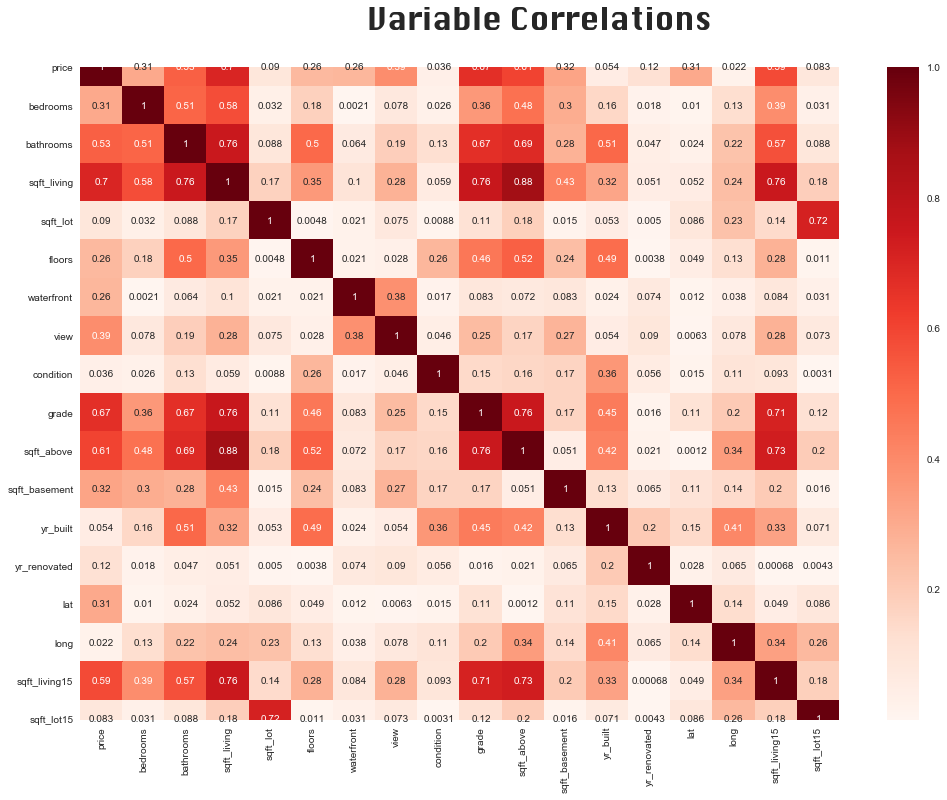

In [34]:
corr = df.corr().abs()
fig, ax=plt.subplots(figsize=(17,12))
fig.suptitle('Variable Correlations', fontsize=30, y=.95, fontname='Silom')
heatmap = sns.heatmap(corr, cmap='Reds', annot=True)
corr

In [35]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [36]:
subset=['sqft_living','grade','sqft_lot','sqft_above','sqft_living15','view','bathrooms','bedrooms']

In [37]:
X=df[subset]
y=df['price']

In [38]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [39]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [40]:
linreg=LinearRegression()
linreg.fit(X_train_scaled,y_train)

LinearRegression()

In [41]:
train_pred=linreg.predict(X_train_scaled)
test_pred=linreg.predict(X_test_scaled)

In [42]:
print(f"Train R2:{r2_score(y_train,train_pred)}")
print(f"Test R2:{r2_score(y_test,test_pred)}")
print('-------------')
print(f"Train RMSE:{mean_squared_error(y_train,train_pred,squared=False)}")
print(f"Test RMSE:{mean_squared_error(y_test,test_pred,squared=False)}")

Train R2:0.5833310228392444
Test R2:0.5728609089897383
-------------
Train RMSE:236467.87482500693
Test RMSE:242081.30788978518


In [43]:
residuals_train=y_train - train_pred
residuals_test=y_test - test_pred


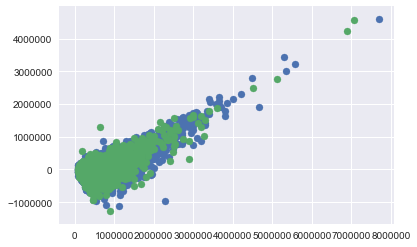

In [44]:
plt.scatter(y_train,residuals_train)
plt.scatter(y_test,residuals_test)

In [45]:
# y=df['price']
# X=df[subset]
# X_int = sm.add_constant(X)
# model = sm.OLS(y,X_int).fit()
# model.summary()

In [46]:
# plt.figure(figsize=(10,5))
# sns.regplot(x=model.predict(), y=model.resid, lowess=True, line_kws={'color': 'red'})
# plt.title('Residuals Scatterplot', fontsize=16, y=.99, fontname='Silom')

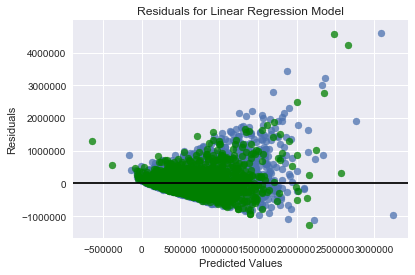

In [47]:
# from yellowbrick.regressor import ResidualsPlot
plt.scatter(train_pred, residuals_train, alpha=.75)
plt.scatter(test_pred, residuals_test, color='g', alpha=.75)
plt.axhline(y=0, color='black')
plt.title('Residuals for Linear Regression Model')
plt.ylabel('Residuals')
plt.xlabel('Predicted Values')
plt.show()

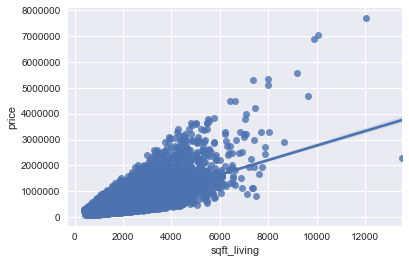

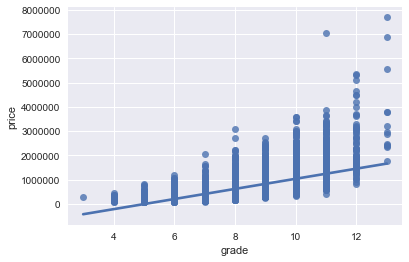

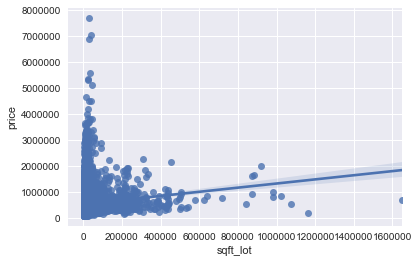

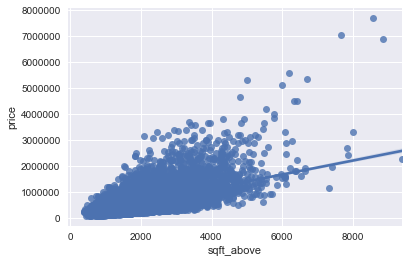

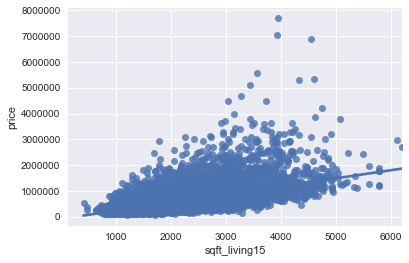

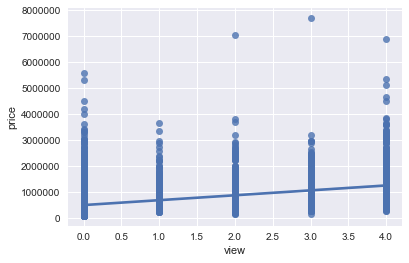

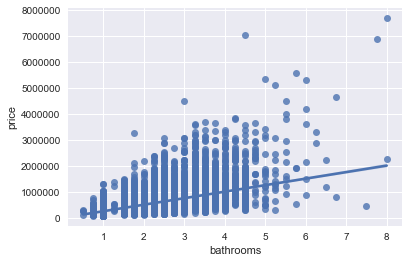

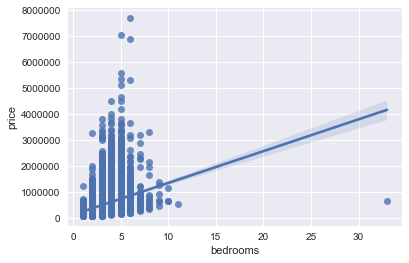

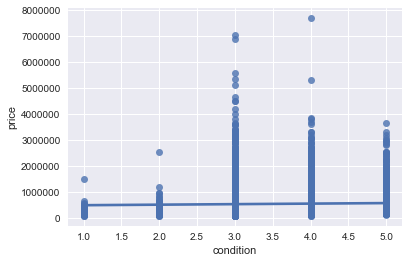

In [48]:
subset2=['sqft_living','grade','sqft_lot','sqft_above','sqft_living15','view','bathrooms','bedrooms','condition']
y = df['price']
# sqft_living_x = house_dff['sqft_living']
X=df[subset2]
for val in X.columns:
#     model = ols(formula = "y~val", data=df).fit()
#     model=ols(formula='y~dfval',data=df).fit()
#     print(f"R-squared: {model.rsquared}")
# #PLOT
#     print(f"RMSE:{mean_squared_error(y,,squared=False)}")
    sns.regplot(x=val, y='price', data=df); #r=0.7
    plt.show()
     

In [49]:
subset3=['sqft_living','grade','sqft_above','sqft_living15','view','bathrooms','price']

In [50]:
df_final=df[subset3]

In [51]:
df_final

,sqft_living,grade,sqft_above,sqft_living15,view,bathrooms,price
0,1180,7,1180,1340,0.0,1.00,221900.0
1,2570,7,2170,1690,0.0,2.25,538000.0
2,770,6,770,2720,0.0,1.00,180000.0
3,1960,7,1050,1360,0.0,3.00,604000.0
4,1680,8,1680,1800,0.0,2.00,510000.0
...,...,...,...,...,...,...,...
21592,1530,8,1530,1530,0.0,2.50,360000.0
21593,2310,8,2310,1830,0.0,2.50,400000.0
21594,1020,7,1020,1020,0.0,0.75,402101.0
21595,1600,8,1600,1410,0.0,2.50,400000.0


In [52]:
# X=df_final
# y=df['price']p

In [53]:
# X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)
# scaler=StandardScaler()
# scaler.fit(X_train)
# X_train_scaled=scaler.transform(X_train)
# X_test_scaled=scaler.transform(X_test)
# linreg=LinearRegression()
# linreg.fit(X_train_scaled,y_train)
# train_pred=linreg.predict(X_train_scaled)
# test_pred=linreg.predict(X_test_scaled)
# print(f"Train R2:{r2_score(y_train,train_pred)}")
# print(f"Test R2:{r2_score(y_test,test_pred)}")
# print('-------------')
# print(f"Train RMSE:{mean_squared_error(y_train,train_pred,squared=False)}")
# print(f"Test RMSE:{mean_squared_error(y_test,test_pred,squared=False)}")

In [54]:
# df['view'].unique()

In [55]:
y=df_final['price']
X=df_final.drop('price',axis=1)
# X_int = sm.add_constant(X)
# model = sm.OLS(y,X_int).fit()
# model.summary()

In [56]:
X

,sqft_living,grade,sqft_above,sqft_living15,view,bathrooms
0,1180,7,1180,1340,0.0,1.00
1,2570,7,2170,1690,0.0,2.25
2,770,6,770,2720,0.0,1.00
3,1960,7,1050,1360,0.0,3.00
4,1680,8,1680,1800,0.0,2.00
...,...,...,...,...,...,...
21592,1530,8,1530,1530,0.0,2.50
21593,2310,8,2310,1830,0.0,2.50
21594,1020,7,1020,1020,0.0,0.75
21595,1600,8,1600,1410,0.0,2.50


In [57]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)
linregg=LinearRegression()
linregg.fit(X_train_scaled,y_train)
train_pred=linregg.predict(X_train_scaled)
test_pred=linregg.predict(X_test_scaled)
print(f"Train R2:{r2_score(y_train,train_pred)}")
print(f"Test R2:{r2_score(y_test,test_pred)}")
print('-------------')
print(f"Train RMSE:{mean_squared_error(y_train,train_pred,squared=False)}")
print(f"Test RMSE:{mean_squared_error(y_test,test_pred,squared=False)}")

Train R2:0.5775084222015455
Test R2:0.568782614551135
-------------
Train RMSE:238114.36314309336
Test RMSE:243234.25014980324


In [58]:
residuals_train=y_train - train_pred
residuals_test=y_test - test_pred

/Users/janakiganesh/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


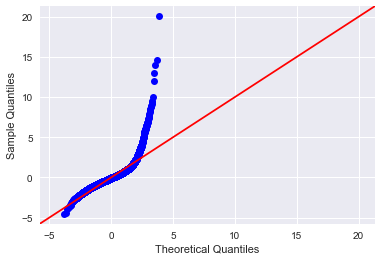

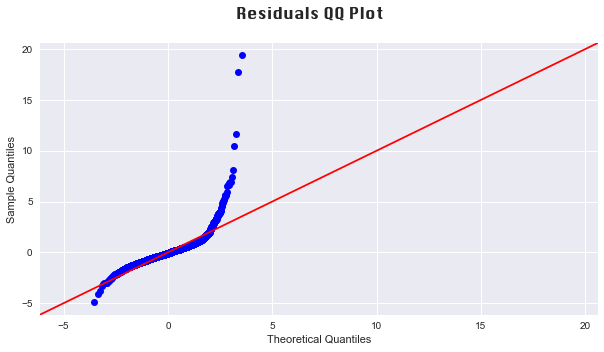

In [59]:
# residuals = model.resid
fig = sm.graphics.qqplot(residuals_train, dist=stats.norm, line='45', fit=True)
fig = sm.graphics.qqplot(residuals_test, dist=stats.norm, line='45', fit=True)
fig.suptitle('Residuals QQ Plot', fontsize=16, fontname='silom')
fig.set_size_inches(10, 5)
fig.show()

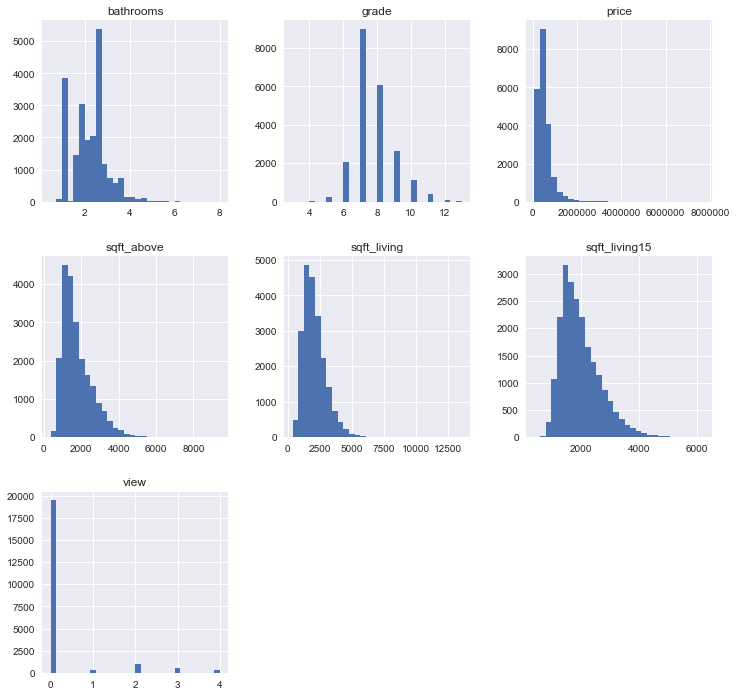

In [60]:
df[subset3].hist(figsize=(12,12),bins=30);

In [61]:
continuous=['sqft_above','sqft_living','sqft_living15','price']

In [62]:
# Log transform and normalize
df_cont = df[continuous]

# log features
log_names = [f'{column}_log' for column in df_cont.columns]

df_log = np.log(df_cont)
df_log.columns = log_names

In [63]:
df_log

,sqft_above_log,sqft_living_log,sqft_living15_log,price_log
0,7.073270,7.073270,7.200425,12.309982
1,7.682482,7.851661,7.432484,13.195614
2,6.646391,6.646391,7.908387,12.100712
3,6.956545,7.580700,7.215240,13.311329
4,7.426549,7.426549,7.495542,13.142166
...,...,...,...,...
21592,7.333023,7.333023,7.333023,12.793859
21593,7.745003,7.745003,7.512071,12.899220
21594,6.927558,6.927558,6.927558,12.904459
21595,7.377759,7.377759,7.251345,12.899220


In [64]:
data=pd.concat([df_log,df_final],axis=1)

In [65]:
data

,sqft_above_log,sqft_living_log,sqft_living15_log,price_log,sqft_living,grade,sqft_above,sqft_living15,view,bathrooms,price
0,7.073270,7.073270,7.200425,12.309982,1180,7,1180,1340,0.0,1.00,221900.0
1,7.682482,7.851661,7.432484,13.195614,2570,7,2170,1690,0.0,2.25,538000.0
2,6.646391,6.646391,7.908387,12.100712,770,6,770,2720,0.0,1.00,180000.0
3,6.956545,7.580700,7.215240,13.311329,1960,7,1050,1360,0.0,3.00,604000.0
4,7.426549,7.426549,7.495542,13.142166,1680,8,1680,1800,0.0,2.00,510000.0
...,...,...,...,...,...,...,...,...,...,...,...
21592,7.333023,7.333023,7.333023,12.793859,1530,8,1530,1530,0.0,2.50,360000.0
21593,7.745003,7.745003,7.512071,12.899220,2310,8,2310,1830,0.0,2.50,400000.0
21594,6.927558,6.927558,6.927558,12.904459,1020,7,1020,1020,0.0,0.75,402101.0
21595,7.377759,7.377759,7.251345,12.899220,1600,8,1600,1410,0.0,2.50,400000.0


In [66]:
data.drop(['sqft_living','sqft_above','sqft_living15','price'],axis=1,inplace=True)

In [67]:
data

,sqft_above_log,sqft_living_log,sqft_living15_log,price_log,grade,view,bathrooms
0,7.073270,7.073270,7.200425,12.309982,7,0.0,1.00
1,7.682482,7.851661,7.432484,13.195614,7,0.0,2.25
2,6.646391,6.646391,7.908387,12.100712,6,0.0,1.00
3,6.956545,7.580700,7.215240,13.311329,7,0.0,3.00
4,7.426549,7.426549,7.495542,13.142166,8,0.0,2.00
...,...,...,...,...,...,...,...
21592,7.333023,7.333023,7.333023,12.793859,8,0.0,2.50
21593,7.745003,7.745003,7.512071,12.899220,8,0.0,2.50
21594,6.927558,6.927558,6.927558,12.904459,7,0.0,0.75
21595,7.377759,7.377759,7.251345,12.899220,8,0.0,2.50


In [68]:
X=data.drop('price_log',axis=1)
y=data['price_log']

In [69]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)
linreg1=LinearRegression()
linreg1.fit(X_train_scaled,y_train)
train_pred=linreg1.predict(X_train_scaled)
test_pred=linreg1.predict(X_test_scaled)
print(f"Train R2:{r2_score(y_train,train_pred)}")
print(f"Test R2:{r2_score(y_test,test_pred)}")
print('-------------')
print(f"Train RMSE:{mean_squared_error(y_train,train_pred,squared=False)}")
print(f"Test RMSE:{mean_squared_error(y_test,test_pred,squared=False)}")

Train R2:0.5800369077132734
Test R2:0.575725504061078
-------------
Train RMSE:0.3417654821862211
Test RMSE:0.34131400565596115


In [70]:
residuals_train=y_train - train_pred
residuals_test=y_test - test_pred

/Users/janakiganesh/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


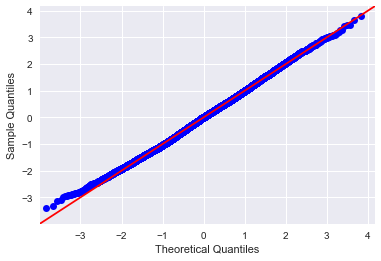

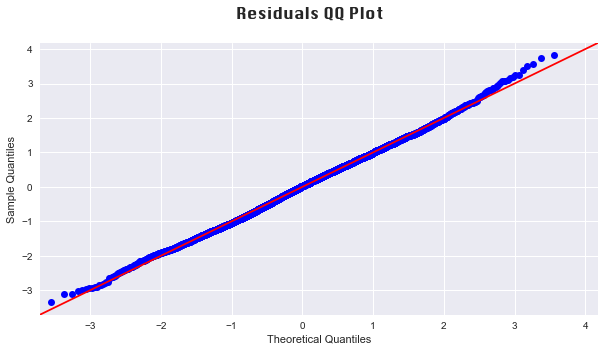

In [71]:
fig = sm.graphics.qqplot(residuals_train, dist=stats.norm, line='45', fit=True)
fig = sm.graphics.qqplot(residuals_test, dist=stats.norm, line='45', fit=True)
fig.suptitle('Residuals QQ Plot', fontsize=16, fontname='silom')
fig.set_size_inches(10, 5)
fig.show()

In [72]:
# X_int = sm.add_constant(X)
# model1 = sm.OLS(y,X_int).fit()
# model1.summary()

In [73]:
# residuals = model1.resid
# fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
# fig.suptitle('Residuals QQ Plot', fontsize=16, fontname='silom')
# fig.set_size_inches(10, 5)
# fig.show()

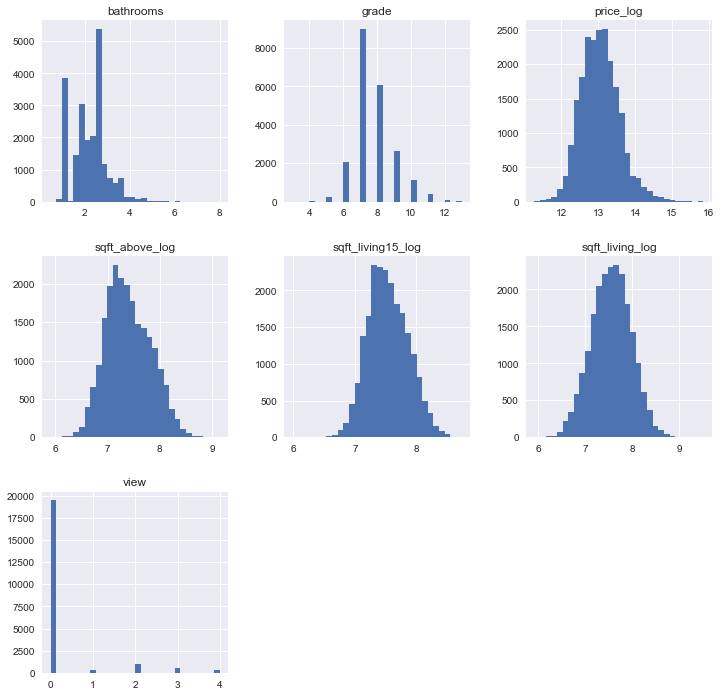

In [74]:
data.hist(figsize=(12,12),bins=30);

In [75]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)
linreg1=LinearRegression()
linreg1.fit(X_train_scaled,y_train)
train_pred=linreg1.predict(X_train_scaled)
test_pred=linreg1.predict(X_test_scaled)
print(f"Train R2:{r2_score(y_train,train_pred)}")
print(f"Test R2:{r2_score(y_test,test_pred)}")
print('-------------')
print(f"Train RMSE:{mean_squared_error(y_train,train_pred,squared=False)}")
print(f"Test RMSE:{mean_squared_error(y_test,test_pred,squared=False)}")

Train R2:0.5800369077132734
Test R2:0.575725504061078
-------------
Train RMSE:0.3417654821862211
Test RMSE:0.34131400565596115


In [76]:
data.corr()

,sqft_above_log,sqft_living_log,sqft_living15_log,price_log,grade,view,bathrooms
sqft_above_log,1.000000,0.864979,0.713102,0.586013,0.742869,0.157019,0.695839
sqft_living_log,0.864979,1.000000,0.746836,0.674802,0.743038,0.244804,0.762135
sqft_living15_log,0.713102,0.746836,1.000000,0.607154,0.689054,0.262556,0.571796
price_log,0.586013,0.674802,0.607154,1.000000,0.703720,0.344653,0.551249
grade,0.742869,0.743038,0.689054,0.703720,1.000000,0.249082,0.665838
view,0.157019,0.244804,0.262556,0.344653,0.249082,1.000000,0.186016
bathrooms,0.695839,0.762135,0.571796,0.551249,0.665838,0.186016,1.000000


,sqft_above_log,sqft_living_log,sqft_living15_log,price_log,grade,view,bathrooms
sqft_above_log,1.000000,0.864979,0.713102,0.586013,0.742869,0.157019,0.695839
sqft_living_log,0.864979,1.000000,0.746836,0.674802,0.743038,0.244804,0.762135
sqft_living15_log,0.713102,0.746836,1.000000,0.607154,0.689054,0.262556,0.571796
price_log,0.586013,0.674802,0.607154,1.000000,0.703720,0.344653,0.551249
grade,0.742869,0.743038,0.689054,0.703720,1.000000,0.249082,0.665838
view,0.157019,0.244804,0.262556,0.344653,0.249082,1.000000,0.186016
bathrooms,0.695839,0.762135,0.571796,0.551249,0.665838,0.186016,1.000000


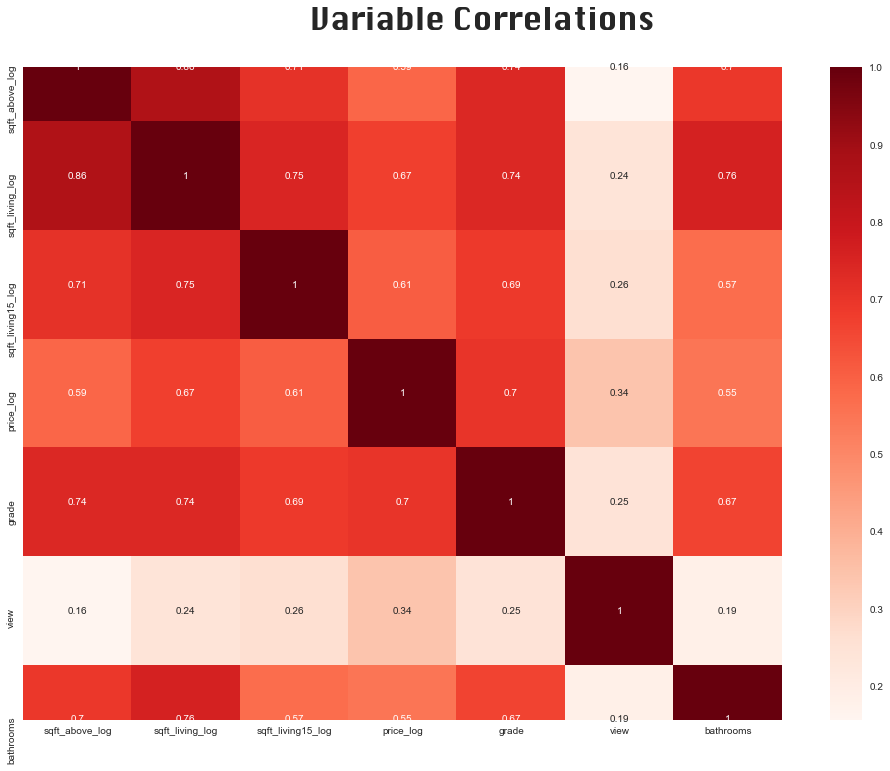

In [77]:
corr = data.corr().abs()
fig, ax=plt.subplots(figsize=(17,12))
fig.suptitle('Variable Correlations', fontsize=30, y=.95, fontname='Silom')
heatmap = sns.heatmap(corr, cmap='Reds', annot=True)
corr

In [78]:
X=data.drop(['price_log','sqft_living_log'],axis=1)
y=data['price_log']

In [79]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)
linreg3=LinearRegression()
linreg3.fit(X_train_scaled,y_train)
train_pred=linreg3.predict(X_train_scaled)
test_pred=linreg3.predict(X_test_scaled)
print(f"Train R2:{r2_score(y_train,train_pred)}")
print(f"Test R2:{r2_score(y_test,test_pred)}")
print('-------------')
print(f"Train RMSE:{mean_squared_error(y_train,train_pred,squared=False)}")
print(f"Test RMSE:{mean_squared_error(y_test,test_pred,squared=False)}")

Train R2:0.5560254312136382
Test R2:0.5465232245990275
-------------
Train RMSE:0.3513999392706709
Test RMSE:0.35286466512965453


In [80]:
residuals_train=y_train - train_pred
residuals_test=y_test - test_pred

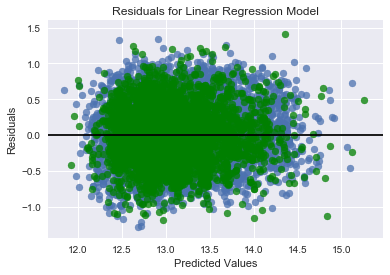

In [81]:
plt.scatter(train_pred, residuals_train, alpha=.75)
plt.scatter(test_pred, residuals_test, color='g', alpha=.75)
plt.axhline(y=0, color='black')
plt.title('Residuals for Linear Regression Model')
plt.ylabel('Residuals')
plt.xlabel('Predicted Values')
plt.show()

In [82]:
# plt.figure(figsize=(10,5))
# sns.regplot(x=model1.predict(), y=model1.resid, lowess=True, line_kws={'color': 'red'})
# plt.title('Residuals Scatterplot', fontsize=16, y=.99, fontname='Silom')

In [83]:
df['yr_built']

0        1955
1        1951
2        1933
3        1965
4        1987
         ... 
21592    2009
21593    2014
21594    2009
21595    2004
21596    2008
Name: yr_built, Length: 21597, dtype: int64

In [84]:
df['yr_renovated'].unique()

array([   0., 1991., 2002., 2010., 1992., 2013., 1994., 1978., 2005.,
       2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990., 1988.,
       1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989., 2004.,
       1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971., 1979.,
       1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008., 1968.,
       2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955., 1982.,
       1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957., 1959.,
       1960., 1967., 1965., 1934., 1972., 1944., 1958.])

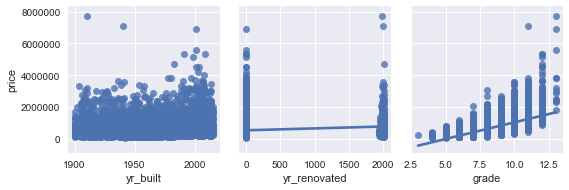

In [85]:
sns.pairplot(df, x_vars=['yr_built', 'yr_renovated','grade'], y_vars='price',kind = 'reg');

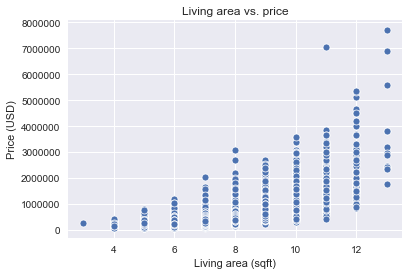

In [86]:
sns.scatterplot(x = df['grade'], y = df['price'], data = df)
plt.title('Living area vs. price')
plt.xlabel('Living area (sqft)')
plt.ylabel('Price (USD)')
plt.show()

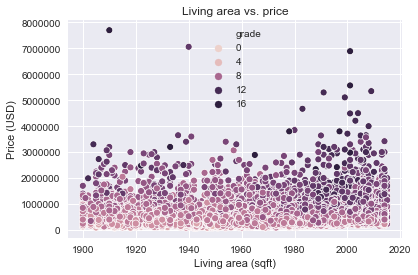

In [87]:
# # Scatter plot of sqft living vs price with hue grade
sns.scatterplot(x = df['yr_built'], y = df['price'], hue = df['grade'],data = df)
plt.title('Living area vs. price')
plt.xlabel('Living area (sqft)')
plt.ylabel('Price (USD)')
plt.show()

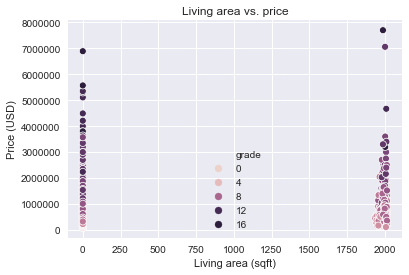

In [88]:
sns.scatterplot(x = df['yr_renovated'], y = df['price'], hue = df['grade'], data = df)
plt.title('Living area vs. price')
plt.xlabel('Living area (sqft)')
plt.ylabel('Price (USD)')
plt.show()

In [89]:
df.sort_values('yr_built',ascending=True)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
14069,2014-07-28,255500.0,4,1.00,1370,41194,1.5,0.0,2.0,5,5,1370,0.0,1900,0.0,98092,47.2716,-122.144,1590,84070
14783,2014-10-23,560000.0,4,1.00,1360,5814,1.5,0.0,0.0,2,6,1360,0.0,1900,0.0,98122,47.6038,-122.314,1010,5814
10973,2015-04-15,730000.0,3,1.75,1650,5000,1.5,0.0,0.0,4,8,1650,0.0,1900,0.0,98107,47.6743,-122.371,1630,5000
115,2014-11-21,740500.0,3,3.50,4380,6350,2.0,0.0,0.0,3,8,2780,0.0,1900,0.0,98117,47.6981,-122.368,1830,6350
4693,2014-06-10,558000.0,4,2.00,2180,3870,1.0,0.0,0.0,3,7,1020,1160.0,1900,0.0,98122,47.6089,-122.303,1520,2580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20235,2015-05-05,771005.0,5,4.50,4000,6713,2.0,0.0,0.0,3,9,4000,0.0,2015,0.0,98024,47.5254,-121.886,3690,6600
7519,2014-12-31,614285.0,5,2.75,2730,6401,2.0,0.0,0.0,3,8,2730,0.0,2015,0.0,98072,47.7685,-122.160,2520,6126
14911,2015-04-21,671000.0,4,2.75,1890,1475,2.0,0.0,0.0,3,9,1200,690.0,2015,0.0,98199,47.6472,-122.383,1650,1682
4150,2015-04-22,631000.0,3,2.25,1670,1396,2.0,0.0,0.0,3,9,1250,420.0,2015,0.0,98115,47.6814,-122.288,1610,5191


In [90]:
# origin_1 = data_fin[data_fin['origin'] == 1]
# origin_2 = data_fin[data_fin['origin'] == 2]
# origin_3 = data_fin[data_fin['origin'] == 3]
# origin_1.head()

In [93]:
uniquenames=df.grade.unique()
gradedict = {val : pd.DataFrame() for val in uniquenames}
for key in gradedict.keys():
    gradedict[key] = df[:][df.grade == key]

In [90]:
# grade_3 = df[df['grade'] == 3]
# grade_4 = df[df['grade'] == 4]
# grade_5 = df[df['grade'] == 5]
# grade_6 = df[df['grade'] == 6]
# grade_7 = df[df['grade'] == 7]
# grade_8 = df[df['grade'] == 8]
# grade_9 = df[df['grade'] == 9]
# grade_10 = df[df['grade'] == 10]
# grade_11 = df[df['grade'] == 11]
# grade_12 = df[df['grade'] == 12]
# grade_13 = df[df['grade'] == 13]
# grade_3.head()





,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3220,2015-02-25,262000.0,1,0.75,520,12981,1.0,0.0,0.0,5,3,520,0.0,1920,0.0,98022,47.2082,-121.995,1340,12233


In [97]:
grade_3

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3220,2015-02-25,262000.0,1,0.75,520,12981,1.0,0.0,0.0,5,3,520,0.0,1920,0.0,98022,47.2082,-121.995,1340,12233


In [176]:
uniquenames=df.grade.unique() 
uniquenames.sort()
print(uniquenames)

[ 3  4  5  6  7  8  9 10 11 12 13]


In [172]:
# uniquenames=df.grade.unique()
# gradedict = {val : pd.DataFrame() for val in uniquenames}
# for key in gradedict.keys():
#     gradedict[key] = df[:][df.grade == key]

uniquenames=df.grade.unique()    
yr_builtdict = {val : gradedict[val].yr_built.values.reshape(-1,1) for val in uniquenames}
# uniquenames=df.grade.unique()
# reg_dict = {val : LinearRegression() for val in uniquenames}

# for num in gradedict.keys():
#     yr_built_dict = {val : gradedict[num].yr_built.values.reshape(-1,1)}



In [173]:
reg_list=['regression_3','regression_4','regression_5','regression_6','regression_7','regression_8','regression_9','regression_10','regression_11','regression_12','regression_13']
yr_built_list=['yr_built_3','yr_built_4','yr_built_5','yr_built_6','yr_built_7','yr_built_8','yr_built_9','yr_built_10','yr_built_11','yr_built_12','yr_built_13']
pred_list=['pred_3','pred_4','pred_5','pred_6','pred_7','pred_8','pred_9','pred_10','pred_11','pred_12','pred_13']



In [174]:
abc=[]
uniquenames=df.grade.unique()
reg_dict = {val : LinearRegression() for val in uniquenames}
reg_dict[7]

LinearRegression()

In [151]:
# regression_3.fit(yr_built_3, grade_3['price'])
abc=[]
for num in uniquenames:
    ab=reg_dict[num].fit(yr_builtdict[num],gradedict[num].price)
    abc.append(ab)


[LinearRegression(), LinearRegression(), LinearRegression(), LinearRegression(), LinearRegression(), LinearRegression(), LinearRegression(), LinearRegression(), LinearRegression(), LinearRegression(), LinearRegression()]


In [154]:
# pred_3 = regression_3.predict(yr_built_3)
abb=[]
for num in uniquenames:
    ac=reg_dict[num].predict(yr_builtdict[num])
    abb.append(ac)


In [155]:
for num in uniquenames:
    print(reg_dict[num].coef_)

[-2332.32979903]
[-1586.35393954]
[-3492.56926511]
[-9321.03418737]
[-5364.81001601]
[-243.19741074]
[-8203.75581432]
[1580.23967095]
[1878.27184246]
[0.]
[-13677.66894865]


In [181]:
def linearRegression(list_):
    for num in list_:
        reg_dict = {val : LinearRegression() for val in list_}
    return reg_dict

In [182]:
def model_fit(list_):
    for num in list_:
        val=reg_dict[num].fit(yr_builtdict[num],gradedict[num].price)
    return val

In [183]:
# def model_predict(list_):
#     for num in list_:
#         val1=reg_dict[num].predict(yr_builtdict[num])
#     return val1
# def model_predict(list_):
#     for num in list_:
#         pred_dict={val : reg_dict[num].predict(yr_builtdict[num]) for val in list_}
#         return pred_dict

In [184]:
def model_coef(list_):
    for num in list_:
        print(reg_dict[num].coef_)
        

In [185]:
linearRegression(uniquenames)

{3: LinearRegression(),
 4: LinearRegression(),
 5: LinearRegression(),
 6: LinearRegression(),
 7: LinearRegression(),
 8: LinearRegression(),
 9: LinearRegression(),
 10: LinearRegression(),
 11: LinearRegression(),
 12: LinearRegression(),
 13: LinearRegression()}

In [187]:
model_fit(uniquenames)

LinearRegression()

In [188]:
model_predict(uniquenames)

array([3377244.53409831, 4457780.38104163, 3336211.52725236,
       3390922.20304696, 3691830.91991726, 4621912.40842543,
       4307326.02260649, 3377244.53409831, 3377244.53409831,
       3445632.87884156, 3555054.23043076, 3869640.6162497 ,
       3431955.20989291])

In [198]:
uniquenames=df.grade.unique() 
for num in uniquenames:
        pred_dict={val : reg_dict[val].predict(yr_builtdict[val]) for val in uniquenames}
# yr_builtdict = {val : gradedict[val].yr_built.values.reshape(-1,1) for val in uniquenames}


In [199]:
pred_dict[3]

array([262000.])

In [100]:
# def interaction_fun(reg_list,yr_built_list,pred_list):
# #     reg_list=[regression_3,regression_4,regression_5,regression_6,regression_7,regression_8,regression_9,regression_10,regression_11,regression_12,regression_13]
#     reg=[]
#     built=[]
#     fit=[]
#     predict=[]
#     for val in reg_list:
#         val=LinearRegression()
#         reg.append(val)
#     for elem in yr_built_list:
#         for num in gradedict:
#             elem=gradedict[num].yr_built.values.reshape(-1,1)
#             built.append(elem)
#     for val1 in reg:
#         for elem1 in built:
#             for num1 in gradedict:
#                 result=val1.fit(elem1,gradedict[num1].price)
#                 fit.append(result)
#     for val2 in reg:
#         for elem2 in built:
#             for num in pred_list:
#                 num=val2.predict(elem2)
#                 predict.append(num)
#     return fit.coef_
            
        







In [196]:
pred_3

array([262000.])

In [197]:
pred_dict[3]

array([3377244.53409831, 4457780.38104163, 3336211.52725236,
       3390922.20304696, 3691830.91991726, 4621912.40842543,
       4307326.02260649, 3377244.53409831, 3377244.53409831,
       3445632.87884156, 3555054.23043076, 3869640.6162497 ,
       3431955.20989291])

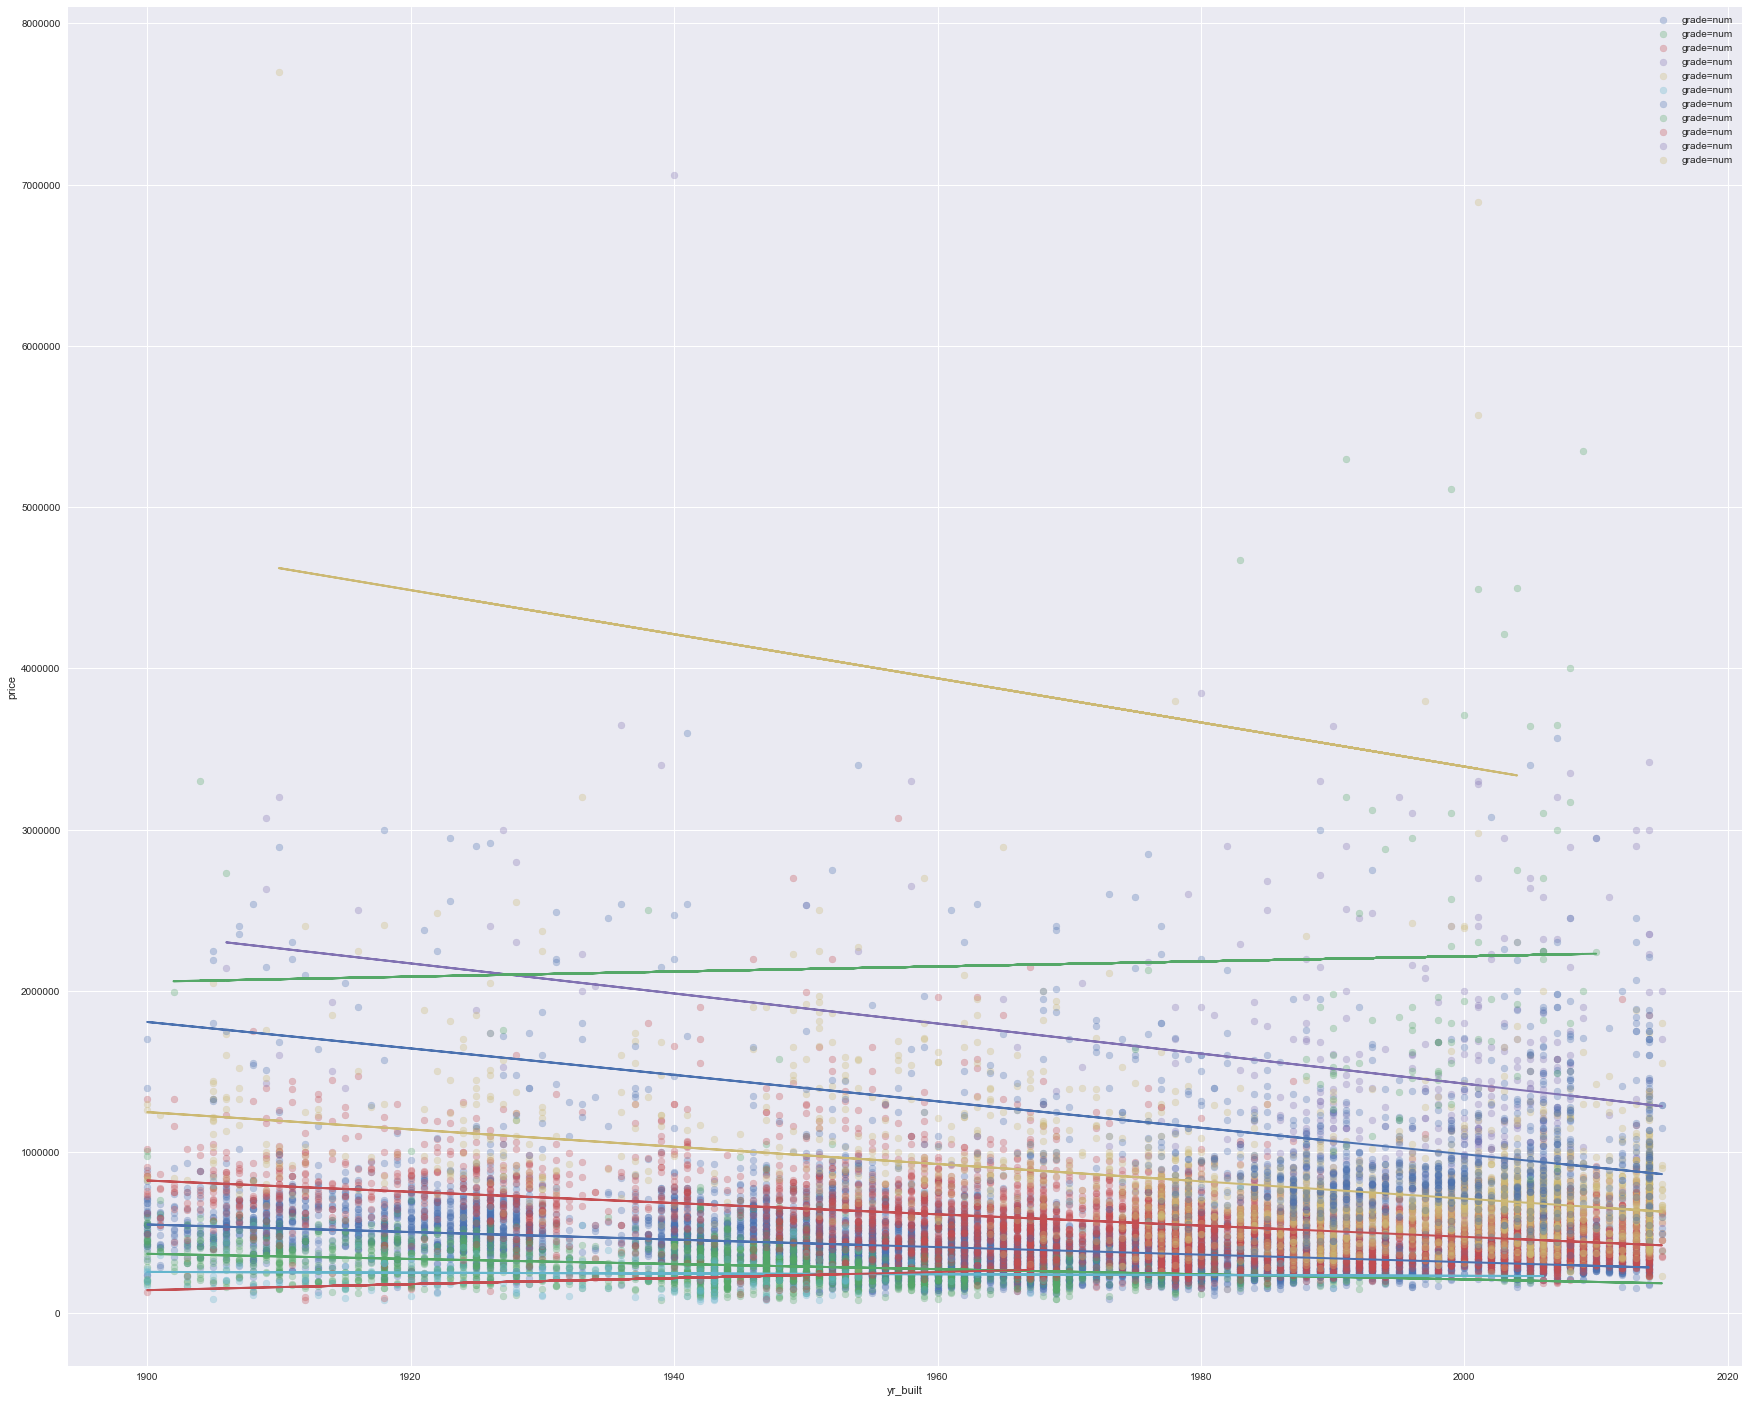

In [200]:
# plt.scatter(yr_built_3, grade_3['price'], alpha=0.3, label = 'grade = 3')
plt.figure(figsize=(30,25))
for num in uniquenames:
    plt.scatter(yr_builtdict[num],gradedict[num].price,alpha=0.3,label='grade=num')
#     plt.scatter(yr_built_3, grade_3['price'], alpha=0.3, label = 'grade = 3')
    plt.plot(yr_builtdict[num], pred_dict[num], linewidth=2)
#     plt.plot(yr_built_3, pred_3, linewidth=2)
    plt.ylabel('price')
plt.xlabel('yr_built')
plt.legend();

In [91]:
regression_3 = LinearRegression()
regression_4 = LinearRegression()
regression_5 = LinearRegression()
regression_6 = LinearRegression()
regression_7 = LinearRegression()
regression_8 = LinearRegression()
regression_9 = LinearRegression()
regression_10 = LinearRegression()
regression_11 = LinearRegression()
regression_12 = LinearRegression()
regression_13 = LinearRegression()

yr_built_3 = grade_3['yr_built'].values.reshape(-1, 1)
yr_built_4 = grade_4['yr_built'].values.reshape(-1, 1)
yr_built_5 = grade_5['yr_built'].values.reshape(-1, 1)
yr_built_6 = grade_6['yr_built'].values.reshape(-1, 1)
yr_built_7 = grade_7['yr_built'].values.reshape(-1, 1)
yr_built_8 = grade_8['yr_built'].values.reshape(-1, 1)
yr_built_9 = grade_9['yr_built'].values.reshape(-1, 1)
yr_built_10 = grade_10['yr_built'].values.reshape(-1, 1)
yr_built_11 = grade_11['yr_built'].values.reshape(-1, 1)
yr_built_12 = grade_12['yr_built'].values.reshape(-1, 1)
yr_built_13 = grade_13['yr_built'].values.reshape(-1, 1)

regression_3.fit(yr_built_3, grade_3['price'])
regression_4.fit(yr_built_4, grade_4['price'])
regression_5.fit(yr_built_5, grade_5['price'])
regression_6.fit(yr_built_6, grade_6['price'])
regression_7.fit(yr_built_7, grade_7['price'])
regression_8.fit(yr_built_8, grade_8['price'])
regression_9.fit(yr_built_9, grade_9['price'])
regression_10.fit(yr_built_10, grade_10['price'])
regression_11.fit(yr_built_11, grade_11['price'])
regression_12.fit(yr_built_12, grade_12['price'])
regression_13.fit(yr_built_13, grade_13['price'])

# Make predictions using the testing set
pred_3 = regression_3.predict(yr_built_3)
pred_4 = regression_4.predict(yr_built_4)
pred_5 = regression_5.predict(yr_built_5)
pred_6 = regression_6.predict(yr_built_6)
pred_7 = regression_7.predict(yr_built_7)
pred_8 = regression_8.predict(yr_built_8)
pred_9 = regression_9.predict(yr_built_9)
pred_10 = regression_10.predict(yr_built_10)
pred_11 = regression_11.predict(yr_built_11)
pred_12 = regression_12.predict(yr_built_12)
pred_13 = regression_13.predict(yr_built_13)

# The coefficients
print(regression_3.coef_)
print(regression_4.coef_)
print(regression_5.coef_)
print(regression_6.coef_)
print(regression_7.coef_)
print(regression_8.coef_)
print(regression_9.coef_)
print(regression_10.coef_)
print(regression_11.coef_)
print(regression_12.coef_)
print(regression_13.coef_)

[0.]
[1878.27184246]
[-243.19741074]
[-1586.35393954]
[-2332.32979903]
[-3492.56926511]
[-5364.81001601]
[-8203.75581432]
[-9321.03418737]
[1580.23967095]
[-13677.66894865]


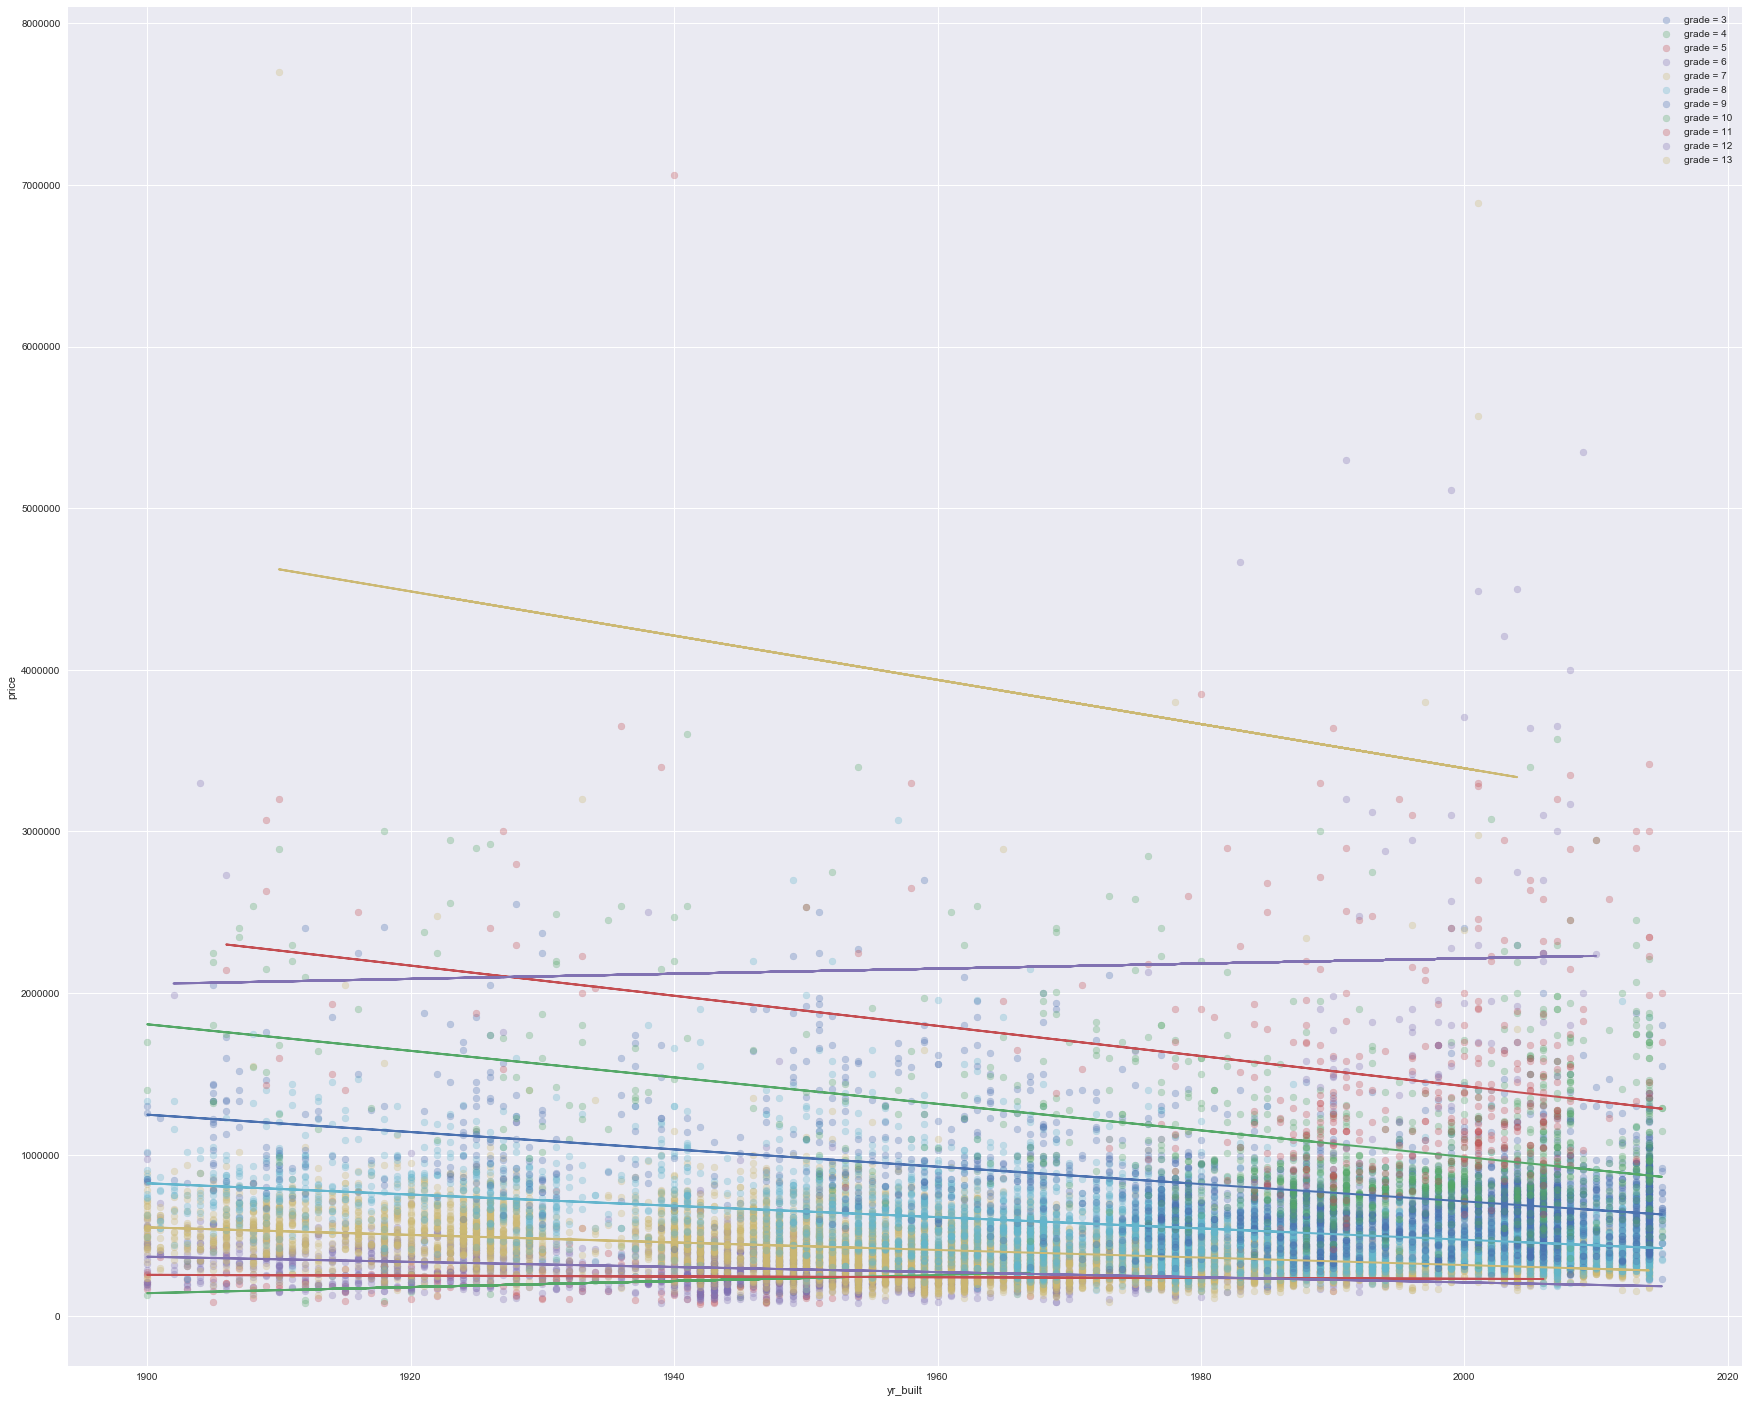

In [118]:
# Plot outputs
plt.figure(figsize=(30,25))

plt.scatter(yr_built_3, grade_3['price'], alpha=0.3, label = 'grade = 3')
plt.scatter(yr_built_4, grade_4['price'], alpha=0.3, label = 'grade = 4')
plt.scatter(yr_built_5, grade_5['price'], alpha=0.3, label = 'grade = 5')
plt.scatter(yr_built_6, grade_6['price'], alpha=0.3, label = 'grade = 6')
plt.scatter(yr_built_7, grade_7['price'], alpha=0.3, label = 'grade = 7')
plt.scatter(yr_built_8, grade_8['price'], alpha=0.3, label = 'grade = 8')
plt.scatter(yr_built_9, grade_9['price'], alpha=0.3, label = 'grade = 9')
plt.scatter(yr_built_10, grade_10['price'], alpha=0.3, label = 'grade = 10')
plt.scatter(yr_built_11, grade_11['price'], alpha=0.3, label = 'grade = 11')
plt.scatter(yr_built_12, grade_12['price'], alpha=0.3, label = 'grade = 12')
plt.scatter(yr_built_13, grade_13['price'], alpha=0.3, label = 'grade = 13')

plt.plot(yr_built_3, pred_3, linewidth=2)
plt.plot(yr_built_4, pred_4, linewidth=2)
plt.plot(yr_built_5, pred_5, linewidth=2)
plt.plot(yr_built_6, pred_6, linewidth=2)
plt.plot(yr_built_7, pred_7, linewidth=2)
plt.plot(yr_built_8, pred_8, linewidth=2)
plt.plot(yr_built_9, pred_9, linewidth=2)
plt.plot(yr_built_10, pred_10, linewidth=2)
plt.plot(yr_built_11, pred_11, linewidth=2)
plt.plot(yr_built_12, pred_12, linewidth=2)
plt.plot(yr_built_13, pred_13, linewidth=2)
plt.ylabel('price')
plt.xlabel('yr_built')
plt.legend();

In [113]:
df.yr_built.sort_values()

14069    1900
14783    1900
10973    1900
115      1900
4693     1900
         ... 
20235    2015
7519     2015
14911    2015
4150     2015
19789    2015
Name: yr_built, Length: 21597, dtype: int64

In [114]:
df.yr_built.unique()

array([1955, 1951, 1933, 1965, 1987, 2001, 1995, 1963, 1960, 2003, 1942,
       1927, 1977, 1900, 1979, 1994, 1916, 1921, 1969, 1947, 1968, 1985,
       1941, 1915, 1909, 1948, 2005, 1929, 1981, 1930, 1904, 1996, 2000,
       1984, 2014, 1922, 1959, 1966, 1953, 1950, 2008, 1991, 1954, 1973,
       1925, 1989, 1972, 1986, 1956, 2002, 1992, 1964, 1952, 1961, 2006,
       1988, 1962, 1939, 1946, 1967, 1975, 1980, 1910, 1983, 1978, 1905,
       1971, 2010, 1945, 1924, 1990, 1914, 1926, 2004, 1923, 2007, 1976,
       1949, 1999, 1901, 1993, 1920, 1997, 1943, 1957, 1940, 1918, 1928,
       1974, 1911, 1936, 1937, 1982, 1908, 1931, 1998, 1913, 2013, 1907,
       1958, 2012, 1912, 2011, 1917, 1932, 1944, 1902, 2009, 1903, 1970,
       2015, 1934, 1938, 1919, 1906, 1935])

In [125]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [143]:
df1=df[['yr_built','yr_renovated']]

In [145]:
data1=pd.concat([data,df1],axis=1)
data1.columns

Index(['sqft_above_log', 'sqft_living_log', 'sqft_living15_log', 'price_log',
       'grade', 'view', 'bathrooms', 'yr_built', 'yr_renovated'],
      dtype='object')

In [146]:
X=data1.drop('price_log',axis=1)
y=data1['price_log']

In [150]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [152]:
regression = LinearRegression()

In [153]:
regression.fit(X_train, y_train)

LinearRegression()

In [154]:
scores = cross_val_score(
            regression, 
            X_train,
            y_train,
            cv=10,
            scoring="neg_mean_squared_error"
)

rmse_scores = np.sqrt(-scores)
display(rmse_scores)
display(rmse_scores.mean())
display(rmse_scores.std())

array([0.32196012, 0.30827591, 0.30255758, 0.32066989, 0.31319961,
       0.31301866, 0.31930147, 0.30648979, 0.3132891 , 0.3169367 ])

0.31356988366621896

0.006041002421458992

In [147]:
# regression = LinearRegression()
crossvalidation = KFold(n_splits=3, shuffle=True, random_state=1)

X_interact_2 = X.copy()
X_interact_2['grade_year'] = X['yr_built'] * X['grade']

interact_grade_year = np.mean(cross_val_score(regression, X_interact_2, y, scoring='r2', cv=crossvalidation))
interact_grade_year

0.6420434552411355

In [149]:
X_interact_2

,sqft_above_log,sqft_living_log,sqft_living15_log,grade,view,bathrooms,yr_built,yr_renovated,grade_year
0,7.073270,7.073270,7.200425,7,0.0,1.00,1955,0.0,13685
1,7.682482,7.851661,7.432484,7,0.0,2.25,1951,1991.0,13657
2,6.646391,6.646391,7.908387,6,0.0,1.00,1933,0.0,11598
3,6.956545,7.580700,7.215240,7,0.0,3.00,1965,0.0,13755
4,7.426549,7.426549,7.495542,8,0.0,2.00,1987,0.0,15896
...,...,...,...,...,...,...,...,...,...
21592,7.333023,7.333023,7.333023,8,0.0,2.50,2009,0.0,16072
21593,7.745003,7.745003,7.512071,8,0.0,2.50,2014,0.0,16112
21594,6.927558,6.927558,6.927558,7,0.0,0.75,2009,0.0,14063
21595,7.377759,7.377759,7.251345,8,0.0,2.50,2004,0.0,16032


In [119]:
data

,sqft_above_log,sqft_living_log,sqft_living15_log,price_log,grade,view,bathrooms
0,7.073270,7.073270,7.200425,12.309982,7,0.0,1.00
1,7.682482,7.851661,7.432484,13.195614,7,0.0,2.25
2,6.646391,6.646391,7.908387,12.100712,6,0.0,1.00
3,6.956545,7.580700,7.215240,13.311329,7,0.0,3.00
4,7.426549,7.426549,7.495542,13.142166,8,0.0,2.00
...,...,...,...,...,...,...,...
21592,7.333023,7.333023,7.333023,12.793859,8,0.0,2.50
21593,7.745003,7.745003,7.512071,12.899220,8,0.0,2.50
21594,6.927558,6.927558,6.927558,12.904459,7,0.0,0.75
21595,7.377759,7.377759,7.251345,12.899220,8,0.0,2.50


In [ ]:

# Create linear regression object
linreg = LinearRegression()

# Fit on training data
linreg.fit(X_train, y_train)


scores = cross_val_score(
            linreg, 
            X_train,
            y_train,
            cv=10,
            scoring="neg_mean_squared_error"
)

rmse_scores = np.sqrt(-scores)
display(rmse_scores)
display(rmse_scores.mean())
display(rmse_scores.std())

In [155]:
X=X_interact_2
y=data1['price_log']

In [156]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)
linreg4=LinearRegression()
linreg4.fit(X_train_scaled,y_train)
train_pred=linreg4.predict(X_train_scaled)
test_pred=linreg4.predict(X_test_scaled)
print(f"Train R2:{r2_score(y_train,train_pred)}")
print(f"Test R2:{r2_score(y_test,test_pred)}")
print('-------------')
print(f"Train RMSE:{mean_squared_error(y_train,train_pred,squared=False)}")
print(f"Test RMSE:{mean_squared_error(y_test,test_pred,squared=False)}")

Train R2:0.647085067318093
Test R2:0.6286563030309209
-------------
Train RMSE:0.3132980216188752
Test RMSE:0.3193145255976609


In [159]:
X=data1.drop('price_log',axis=1)
y=data1['price_log']
baseline=0.5560254312136382

In [160]:
from itertools import combinations

interactions = []

feat_combinations = combinations(X.columns, 2)

data_3 = X.copy()
for i, (a, b) in enumerate(feat_combinations):
    data_3['interaction'] = data_3[a] * data_3[b]
    score = np.mean(cross_val_score(regression, data_3, y, scoring='r2', cv=crossvalidation))
    if score > baseline:
        interactions.append((a, b, round(score,3)))
    
    if i % 50 == 0:
        print(i)
            
print('Top 3 interactions: %s' %sorted(interactions, key=lambda inter: inter[2], reverse=True)[:3])

0
Top 3 interactions: [('sqft_living15_log', 'yr_built', 0.645), ('sqft_living15_log', 'grade', 0.644), ('sqft_above_log', 'sqft_living_log', 0.643)]


In [161]:
data1

,sqft_above_log,sqft_living_log,sqft_living15_log,price_log,grade,view,bathrooms,yr_built,yr_renovated
0,7.073270,7.073270,7.200425,12.309982,7,0.0,1.00,1955,0.0
1,7.682482,7.851661,7.432484,13.195614,7,0.0,2.25,1951,1991.0
2,6.646391,6.646391,7.908387,12.100712,6,0.0,1.00,1933,0.0
3,6.956545,7.580700,7.215240,13.311329,7,0.0,3.00,1965,0.0
4,7.426549,7.426549,7.495542,13.142166,8,0.0,2.00,1987,0.0
...,...,...,...,...,...,...,...,...,...
21592,7.333023,7.333023,7.333023,12.793859,8,0.0,2.50,2009,0.0
21593,7.745003,7.745003,7.512071,12.899220,8,0.0,2.50,2014,0.0
21594,6.927558,6.927558,6.927558,12.904459,7,0.0,0.75,2009,0.0
21595,7.377759,7.377759,7.251345,12.899220,8,0.0,2.50,2004,0.0


In [166]:
data1['sqft_living_log']

0        7.073270
1        7.851661
2        6.646391
3        7.580700
4        7.426549
           ...   
21592    7.333023
21593    7.745003
21594    6.927558
21595    7.377759
21596    6.927558
Name: sqft_living_log, Length: 21597, dtype: float64

In [168]:
# Define 'tiers' of sqft
sqft = np.asarray(data1[['sqft_living_log']]).reshape(len(data1[['sqft_living_log']]))
high_sqft = data1[sqft > np.percentile(sqft, 67)]
med_sqft = data1[(sqft > np.percentile(sqft, 33)) & (sqft <= np.percentile(sqft, 67))]
low_sqft = data1[sqft <= np.percentile(sqft, 33)]

In [ ]:
high_sqft = data1[sqft > np.percentile(sqft, 67)]
med_sqft = data1[(sqft > np.percentile(sqft, 33)) & (sqft <= np.percentile(sqft, 67))]
low_sqft = data1[sqft <= np.percentile(sqft, 33)]

In [176]:
regression_1 = LinearRegression()
regression_2 = LinearRegression()
regression_3 = LinearRegression()

yr_built1 = high_sqft['yr_built'].values.reshape(-1, 1)
yr_built2 = med_sqft['yr_built'].values.reshape(-1, 1)
yr_built3 = low_sqft['yr_built'].values.reshape(-1, 1)

regression_1.fit(yr_built1, high_sqft['price_log'])
regression_2.fit(yr_built2, med_sqft['price_log'])
regression_3.fit(yr_built3, low_sqft['price_log'])

# Make predictions using the testing set
pred_1 = regression_1.predict(yr_built1)
pred_2 = regression_2.predict(yr_built2)
pred_3 = regression_3.predict(yr_built3)

# The coefficients
print(regression_1.coef_)
print(regression_2.coef_)
print(regression_3.coef_)

[-0.00203552]
[-0.00328888]
[-0.0006947]


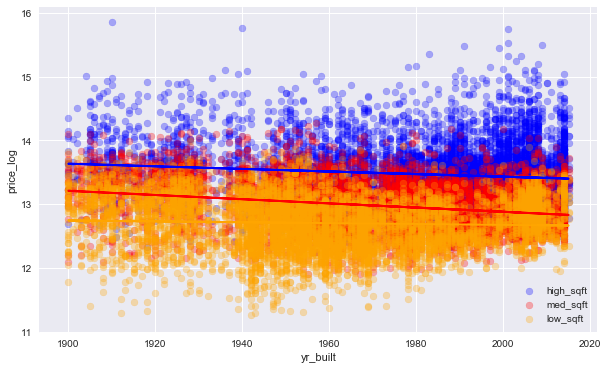

In [178]:
# Plot outputs
plt.figure(figsize=(10,6))

plt.scatter(yr_built1, high_sqft['price_log'],  color='blue', alpha=0.3, label = 'high_sqft')
plt.scatter(yr_built2, med_sqft['price_log'],  color='red', alpha=0.3, label = 'med_sqft')
plt.scatter(yr_built3, low_sqft['price_log'],  color='orange', alpha=0.3, label = 'low_sqft')

plt.plot(yr_built1, pred_1, color='blue', linewidth=2)
plt.plot(yr_built2, pred_2, color='red', linewidth=2)
plt.plot(yr_built3, pred_3, color='orange', linewidth=2)
plt.ylabel('price_log')
plt.xlabel('yr_built')
plt.legend();

In [179]:
data1


,sqft_above_log,sqft_living_log,sqft_living15_log,price_log,grade,view,bathrooms,yr_built,yr_renovated
0,7.073270,7.073270,7.200425,12.309982,7,0.0,1.00,1955,0.0
1,7.682482,7.851661,7.432484,13.195614,7,0.0,2.25,1951,1991.0
2,6.646391,6.646391,7.908387,12.100712,6,0.0,1.00,1933,0.0
3,6.956545,7.580700,7.215240,13.311329,7,0.0,3.00,1965,0.0
4,7.426549,7.426549,7.495542,13.142166,8,0.0,2.00,1987,0.0
...,...,...,...,...,...,...,...,...,...
21592,7.333023,7.333023,7.333023,12.793859,8,0.0,2.50,2009,0.0
21593,7.745003,7.745003,7.512071,12.899220,8,0.0,2.50,2014,0.0
21594,6.927558,6.927558,6.927558,12.904459,7,0.0,0.75,2009,0.0
21595,7.377759,7.377759,7.251345,12.899220,8,0.0,2.50,2004,0.0


In [183]:
data1['yr_last_constructed'] = data1[['yr_built', 'yr_renovated']].max(axis=1)

,sqft_above_log,sqft_living_log,sqft_living15_log,price_log,grade,view,bathrooms,yr_built,yr_renovated,yr_last_constructed
0,7.073270,7.073270,7.200425,12.309982,7,0.0,1.00,1955,0.0,1955.0
1,7.682482,7.851661,7.432484,13.195614,7,0.0,2.25,1951,1991.0,1991.0
2,6.646391,6.646391,7.908387,12.100712,6,0.0,1.00,1933,0.0,1933.0
3,6.956545,7.580700,7.215240,13.311329,7,0.0,3.00,1965,0.0,1965.0
4,7.426549,7.426549,7.495542,13.142166,8,0.0,2.00,1987,0.0,1987.0
...,...,...,...,...,...,...,...,...,...,...
21592,7.333023,7.333023,7.333023,12.793859,8,0.0,2.50,2009,0.0,2009.0
21593,7.745003,7.745003,7.512071,12.899220,8,0.0,2.50,2014,0.0,2014.0
21594,6.927558,6.927558,6.927558,12.904459,7,0.0,0.75,2009,0.0,2009.0
21595,7.377759,7.377759,7.251345,12.899220,8,0.0,2.50,2004,0.0,2004.0


In [189]:
data1

,sqft_above_log,sqft_living_log,sqft_living15_log,price_log,grade,view,bathrooms,yr_built,yr_renovated,yr_last_constructed
0,7.073270,7.073270,7.200425,12.309982,7,0.0,1.00,1955,0.0,1955.0
1,7.682482,7.851661,7.432484,13.195614,7,0.0,2.25,1951,1991.0,1991.0
2,6.646391,6.646391,7.908387,12.100712,6,0.0,1.00,1933,0.0,1933.0
3,6.956545,7.580700,7.215240,13.311329,7,0.0,3.00,1965,0.0,1965.0
4,7.426549,7.426549,7.495542,13.142166,8,0.0,2.00,1987,0.0,1987.0
...,...,...,...,...,...,...,...,...,...,...
21592,7.333023,7.333023,7.333023,12.793859,8,0.0,2.50,2009,0.0,2009.0
21593,7.745003,7.745003,7.512071,12.899220,8,0.0,2.50,2014,0.0,2014.0
21594,6.927558,6.927558,6.927558,12.904459,7,0.0,0.75,2009,0.0,2009.0
21595,7.377759,7.377759,7.251345,12.899220,8,0.0,2.50,2004,0.0,2004.0


In [192]:
X=data1.drop('price_log',axis=1)
y=data1['price_log']

In [191]:
y

0        12.309982
1        13.195614
2        12.100712
3        13.311329
4        13.142166
           ...    
21592    12.793859
21593    12.899220
21594    12.904459
21595    12.899220
21596    12.691580
Name: price_log, Length: 21597, dtype: float64

In [193]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)
linreg5=LinearRegression()
linreg5.fit(X_train_scaled,y_train)
train_pred=linreg5.predict(X_train_scaled)
test_pred=linreg5.predict(X_test_scaled)
print(f"Train R2:{r2_score(y_train,train_pred)}")
print(f"Test R2:{r2_score(y_test,test_pred)}")
print('-------------')
print(f"Train RMSE:{mean_squared_error(y_train,train_pred,squared=False)}")
print(f"Test RMSE:{mean_squared_error(y_test,test_pred,squared=False)}")

Train R2:0.646934821205702
Test R2:0.6288530227702656
-------------
Train RMSE:0.31336470454515175
Test RMSE:0.31922993577951797


In [195]:
data1

,sqft_above_log,sqft_living_log,sqft_living15_log,price_log,grade,view,bathrooms,yr_built,yr_renovated,yr_last_constructed
0,7.073270,7.073270,7.200425,12.309982,7,0.0,1.00,1955,0.0,1955.0
1,7.682482,7.851661,7.432484,13.195614,7,0.0,2.25,1951,1991.0,1991.0
2,6.646391,6.646391,7.908387,12.100712,6,0.0,1.00,1933,0.0,1933.0
3,6.956545,7.580700,7.215240,13.311329,7,0.0,3.00,1965,0.0,1965.0
4,7.426549,7.426549,7.495542,13.142166,8,0.0,2.00,1987,0.0,1987.0
...,...,...,...,...,...,...,...,...,...,...
21592,7.333023,7.333023,7.333023,12.793859,8,0.0,2.50,2009,0.0,2009.0
21593,7.745003,7.745003,7.512071,12.899220,8,0.0,2.50,2014,0.0,2014.0
21594,6.927558,6.927558,6.927558,12.904459,7,0.0,0.75,2009,0.0,2009.0
21595,7.377759,7.377759,7.251345,12.899220,8,0.0,2.50,2004,0.0,2004.0


In [201]:
data1.drop('yr_last_constructed',axis=1,inplace=True)

In [229]:
categorical=['grade']

In [203]:
data1[categorical]

,grade,bathrooms
0,7,1.00
1,7,2.25
2,6,1.00
3,7,3.00
4,8,2.00
...,...,...
21592,8,2.50
21593,8,2.50
21594,7,0.75
21595,8,2.50


In [230]:
data1['bathrooms'].unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 1.25, 5.25, 6.  , 0.5 , 5.5 ,
       6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

In [231]:
bathrooms_data = np.asarray(data1[['bathrooms']]).reshape(len(data1[['bathrooms']]))
# high_sqft = data1[sqft > np.percentile(sqft, 67)]

In [220]:
data1

,sqft_above_log,sqft_living_log,sqft_living15_log,price_log,grade,view,bathrooms,yr_built,yr_renovated
0,7.073270,7.073270,7.200425,12.309982,7,0.0,1.00,1955,0.0
1,7.682482,7.851661,7.432484,13.195614,7,0.0,2.25,1951,1991.0
2,6.646391,6.646391,7.908387,12.100712,6,0.0,1.00,1933,0.0
3,6.956545,7.580700,7.215240,13.311329,7,0.0,3.00,1965,0.0
4,7.426549,7.426549,7.495542,13.142166,8,0.0,2.00,1987,0.0
...,...,...,...,...,...,...,...,...,...
21592,7.333023,7.333023,7.333023,12.793859,8,0.0,2.50,2009,0.0
21593,7.745003,7.745003,7.512071,12.899220,8,0.0,2.50,2014,0.0
21594,6.927558,6.927558,6.927558,12.904459,7,0.0,0.75,2009,0.0
21595,7.377759,7.377759,7.251345,12.899220,8,0.0,2.50,2004,0.0


In [232]:
final_data=data1[bathrooms_data <= 4]
final_data

,sqft_above_log,sqft_living_log,sqft_living15_log,price_log,grade,view,bathrooms,yr_built,yr_renovated
0,7.073270,7.073270,7.200425,12.309982,7,0.0,1.00,1955,0.0
1,7.682482,7.851661,7.432484,13.195614,7,0.0,2.25,1951,1991.0
2,6.646391,6.646391,7.908387,12.100712,6,0.0,1.00,1933,0.0
3,6.956545,7.580700,7.215240,13.311329,7,0.0,3.00,1965,0.0
4,7.426549,7.426549,7.495542,13.142166,8,0.0,2.00,1987,0.0
...,...,...,...,...,...,...,...,...,...
21592,7.333023,7.333023,7.333023,12.793859,8,0.0,2.50,2009,0.0
21593,7.745003,7.745003,7.512071,12.899220,8,0.0,2.50,2014,0.0
21594,6.927558,6.927558,6.927558,12.904459,7,0.0,0.75,2009,0.0
21595,7.377759,7.377759,7.251345,12.899220,8,0.0,2.50,2004,0.0


In [233]:
df_cate=pd.get_dummies(final_data,columns=categorical,drop_first=True)

In [234]:
df_cate.columns

Index(['sqft_above_log', 'sqft_living_log', 'sqft_living15_log', 'price_log',
       'view', 'bathrooms', 'yr_built', 'yr_renovated', 'grade_4', 'grade_5',
       'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11',
       'grade_12', 'grade_13'],
      dtype='object')

In [235]:
X=df_cate.drop(['price_log'],axis=1)
y=df_cate['price_log']

In [236]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)
linreg6=LinearRegression()
linreg6.fit(X_train_scaled,y_train)
train_pred=linreg6.predict(X_train_scaled)
test_pred=linreg6.predict(X_test_scaled)
print(f"Train R2:{r2_score(y_train,train_pred)}")
print(f"Test R2:{r2_score(y_test,test_pred)}")
print('-------------')
print(f"Train RMSE:{mean_squared_error(y_train,train_pred,squared=False)}")
print(f"Test RMSE:{mean_squared_error(y_test,test_pred,squared=False)}")

Train R2:0.6244289931353437
Test R2:0.6225179998303552
-------------
Train RMSE:0.31118154227570055
Test RMSE:0.3194706157444359


In [237]:
X=X_interact_2
y=data1['price_log']

In [239]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)
linreg4=LinearRegression()
linreg4.fit(X_train_scaled,y_train)
train_pred=linreg4.predict(X_train_scaled)
test_pred=linreg4.predict(X_test_scaled)
print(f"Train R2:{r2_score(y_train,train_pred)}")
print(f"Test R2:{r2_score(y_test,test_pred)}")
print('-------------')
print(f"Train RMSE:{mean_squared_error(y_train,train_pred,squared=False)}")
print(f"Test RMSE:{mean_squared_error(y_test,test_pred,squared=False)}")

Train R2:0.647085067318093
Test R2:0.6286563030309209
-------------
Train RMSE:0.3132980216188752
Test RMSE:0.3193145255976609


In [249]:
linreg4.coef_

array([-0.00419761,  0.22257348,  0.14945723,  0.0592229 ])

In [238]:
X_interact_3 = sm.add_constant(X_interact_2)
model_final = sm.OLS(y,X_interact_3)
results = model_final.fit()

results.summary()

/Users/janakiganesh/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     4313.
Date:                Fri, 15 Jan 2021   Prob (F-statistic):               0.00
Time:                        08:31:46   Log-Likelihood:                -5681.0
No. Observations:               21597   AIC:                         1.138e+04
Df Residuals:                   21587   BIC:                         1.146e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                22.1540      0.985     22.481      0.000      20.222      24.086
sqft_above_log       -0.0540      0.011     -4.888      0.000      -0.076      -0.032
sqft_living_log       0.2712      0.013     21.426      0.000       0.246       0.296
sqft_living15_log     0.1911      0.011     18.160      0.000       0.170       0.212
grade                -0.1953      0.130     -1.501      0.133      -0.450       0.060
view                  0.0655      0.003     21.756      0.000       0.060       0.071
bathrooms             0.1019      0.005     21.308      0.000       0.093       0.111
yr_built             -0.0072      0.000    -14.411      0.000      -0.008      -0.006
yr_renovated       1.826e-05   6.16e-06      2.964      0.003    6.19e-06    3.03e-05
grade_year            0.0002   6.58e-05      3.258      0.001    8.54e-05       0.000
==============================================================================
Omnibus:                       50.588   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.916
Skew:                          -0.105   Prob(JB):                     5.33e-12
Kurtosis:                       3.117   Cond. No.                     7.15e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.15e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""